In [13]:
# import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# load data
data = pd.read_csv('exam_data.csv')
data.head()

,Exam1,Exam2,Pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


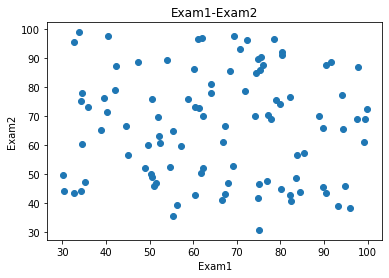

In [4]:
# visualize data
fig = plt.figure()
plt.scatter(data.loc[:, 'Exam1'], data.loc[:, 'Exam2'])
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.show()

In [6]:
# add label mask
mask = data.loc[:, 'Pass'] == 1

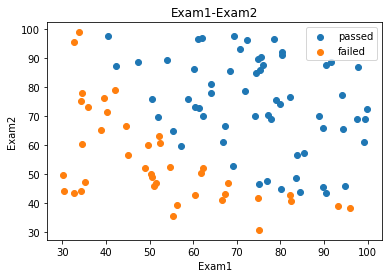

In [7]:
# visualize the passed and failed exams
fig2 = plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask], data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask], data.loc[:,'Exam2'][~mask])
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed, failed),('passed', 'failed'))
plt.show()

In [8]:
# define X and y
X = data.drop(['Pass'], axis = 1)
y = data.loc[:, 'Pass']
X1 = data.loc[:, 'Exam1']
X2 = data.loc[:, 'Exam2']

In [10]:
# set up the model
LR = LogisticRegression()

In [11]:
# train the model
LR.fit(X,y)

LogisticRegression()

In [12]:
# make a prediction with the model
y_predict = LR.predict(X)

In [14]:
# evaluate the result
y_score = accuracy_score(y, y_predict)
print(y_score)

0.89


In [15]:
# make a prediction on random testing data: exam1 = 70, exam2 = 65
y_test = LR.predict([[70,65]])
print('passed' if y_test == 1 else 'failed')

passed


In [17]:
# extracting the coefficients and the intercept from the decision boundary equation
theta0 = LR.intercept_
theta1, theta2 = LR.coef_[0][0], LR.coef_[0][1]

In [18]:
# calculating new X2 (exam2) data assuming X1 (exam1) is given
X2_new = -(theta0 + theta1 * X1)/theta2

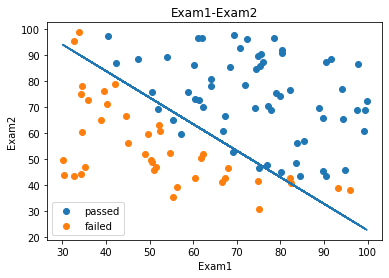

In [19]:
# visualize the decision boundary with the original data
fig3 = plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask], data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask], data.loc[:,'Exam2'][~mask])

plt.plot(X1, X2_new)

plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed, failed),('passed', 'failed'))

plt.show()

In [20]:
# generate new data based on the given data (exam1 and exam2)
X1_2 = X1*X1
X2_2 = X2*X2
X1_X2 = X1*X2
X_new = {'X1':X1, 'X2':X2, 'X1_2':X1_2, 'X2_2':X2_2, 'X1_X2': X1_X2}

In [21]:
# convert new data into dataFrame 
X_new = pd.DataFrame(X_new)
print(X_new)

           X1         X2         X1_2         X2_2        X1_X2
0   34.623660  78.024693  1198.797805  6087.852690  2701.500406
1   30.286711  43.894998   917.284849  1926.770807  1329.435094
2   35.847409  72.902198  1285.036716  5314.730478  2613.354893
3   60.182599  86.308552  3621.945269  7449.166166  5194.273015
4   79.032736  75.344376  6246.173368  5676.775061  5954.672216
..        ...        ...          ...          ...          ...
95  83.489163  48.380286  6970.440295  2340.652054  4039.229555
96  42.261701  87.103851  1786.051355  7587.080849  3681.156888
97  99.315009  68.775409  9863.470975  4730.056948  6830.430397
98  55.340018  64.931938  3062.517544  4216.156574  3593.334590
99  74.775893  89.529813  5591.434174  8015.587398  6694.671710

[100 rows x 5 columns]


In [22]:
# set up a new logistics regression model 
LR2 = LogisticRegression()

In [23]:
# traint the model
LR2.fit(X_new, y)

LogisticRegression()

In [24]:
# make a prediction with the new model
y2_predict = LR2.predict(X_new)

In [28]:
# evaluate the result from the new model
accuracy2 = accuracy_score(y, y2_predict)
print(accuracy2)

1.0


In [29]:
# sort new data (for visualization)
X1_new = X1.sort_values()

In [30]:
# extract coefficients and intercept from the decision boundary equation
theta0 = LR2.intercept_
theta1, theta2, theta3, theta4, theta5 = LR2.coef_[0][0], LR2.coef_[0][1], LR2.coef_[0][2], LR2.coef_[0][3], LR2.coef_[0][4]

In [31]:
# calculate the new X2 data (exam2) with the quadratic formula
a = theta4
b = theta5*X1_new+theta2
c = theta0+theta1*X1_new+theta3*X1_new*X1_new
X2_new_boundary = (-b+np.sqrt(b*b-4*a*c))/(2*a)

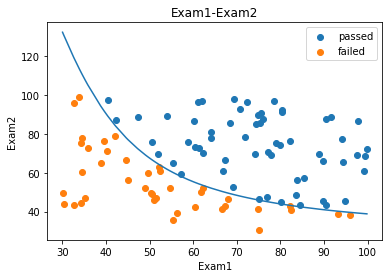

In [32]:
# visualize the new boundary equation with the original data
fig4 = plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask], data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask], data.loc[:,'Exam2'][~mask])

plt.plot(X1_new, X2_new_boundary)

plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed, failed),('passed', 'failed'))

plt.show()